In [2]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
df = pd.read_csv('train.csv')
fig = plt.figure(figsize=(18,6))

<Figure size 1296x432 with 0 Axes>

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Vamos usar o teste Qui quadrado para verificar se existe associação entre 2 variaveis qualitativas. 

In [21]:
df.Survived[df.Sex=='male'].value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [7]:
df.Survived[df.Sex == 'female'].value_counts()

1    233
0     81
Name: Survived, dtype: int64

In [9]:
print("Porcentagem de Homens que sobreviveram:",109/(109+233))
print("Porcentagem de Mulheres que sobreviveram:",233/(109+233))



Porcentagem de Homens que sobreviveram: 0.31871345029239767
Porcentagem de Mulheres que sobreviveram: 0.6812865497076024


Text(0.5, 1.0, 'Survived by Sex')

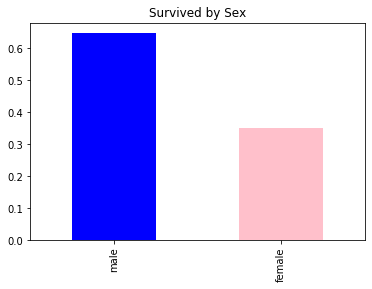

In [82]:
df.Sex.value_counts(normalize=True).plot(kind='bar',color=['blue','pink'])
plt.title('Survived by Sex')

Text(0.5, 1.0, 'Men Survived')

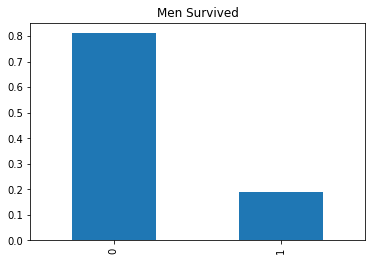

In [80]:
df.Survived[df.Sex=='male'].value_counts(normalize=True).plot(kind='bar')
plt.title('Men Survived')

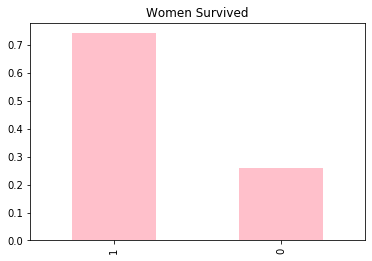

In [78]:
df.Survived[df.Sex=='female'].value_counts(normalize=True).plot(kind='bar',color='pink')
plt.title('Women Survived')
plt.show()

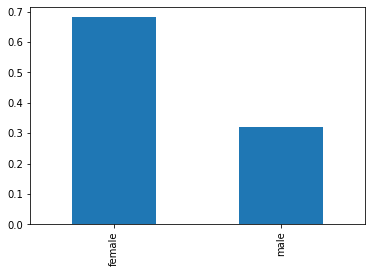

In [72]:
df.Sex[df.Survived==1].value_counts(normalize=True).plot(kind='bar')

/home/hironu/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/hironu/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

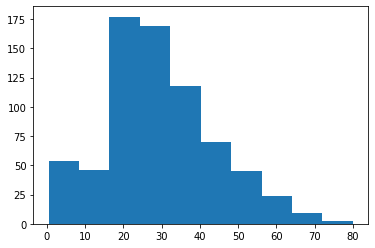

In [73]:
#preciso tratar os nulos 
plt.hist(df.Age)

(array([23., 11., 41., 47., 44., 35., 24., 19.,  9.,  8.]),
 array([ 0.75 ,  6.975, 13.2  , 19.425, 25.65 , 31.875, 38.1  , 44.325,
        50.55 , 56.775, 63.   ]),
 <a list of 10 Patch objects>)

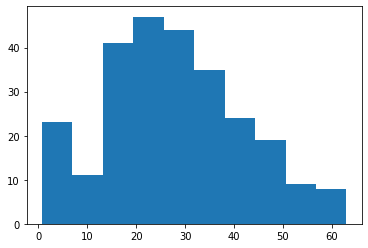

In [75]:
plt.hist(df.Age[df.Sex=='female'])


(array([ 28.,  23., 109., 117.,  74.,  46.,  29.,  16.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

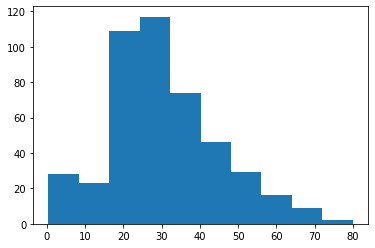

In [77]:
plt.hist(df.Age[df.Sex=='male'])


In [86]:
plt.hist(df.Survived[df.Pclass=1])


SyntaxError: invalid syntax (<ipython-input-86-6e9e1421f8ca>, line 1)